In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter

%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')


### Model assumptions of linear regression are :
### 1. All the columns should be numeric continuos and not categorical
### 2. There should be a linear relationship between predictors and predictant
### 3. All predictors are independent of each other
### 4. Data should be free of missing values and outliers
### 5. Residuals are normally distributed

In [2]:
# Lets get a general sense of data
house_data=pd.read_csv('kc_house_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
house_data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
# Above mentioned are the model assumptions of linear regression, lets check if any of the model assumptions are violated
house_data.isnull().sum()
# One of the model assumptions of linear regression is that the model should be free of missing values. Here, we conclude that 
# the model is free of missing values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
# Dropping the id and date columns
house_data = house_data.drop(['id', 'date'],axis=1)

In [7]:
house_data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(14)
memory usage: 3.1 MB


In [9]:
# The columns of house_data are 
house_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
# Lets check which of these have a linear relationship with our target variable price

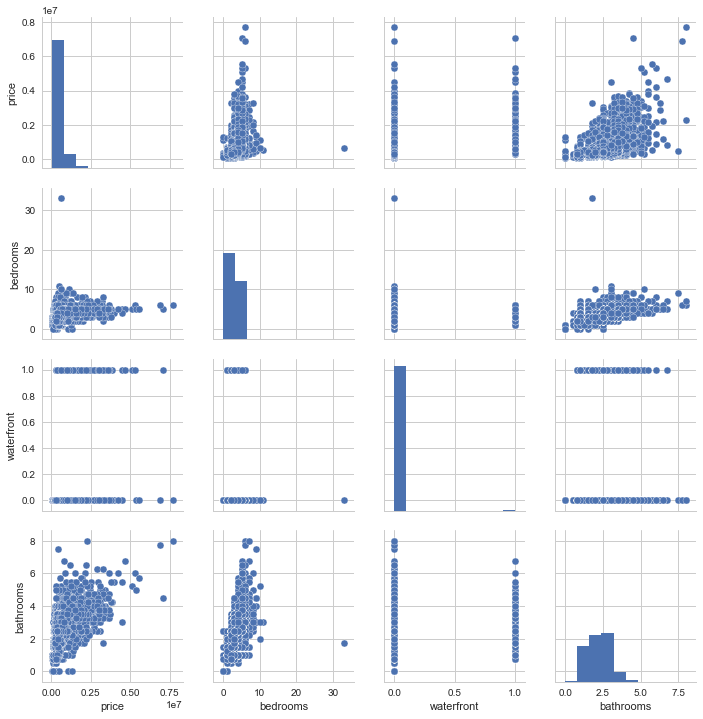

In [11]:
sb.pairplot(house_data[['price','bedrooms','waterfront','bathrooms']])

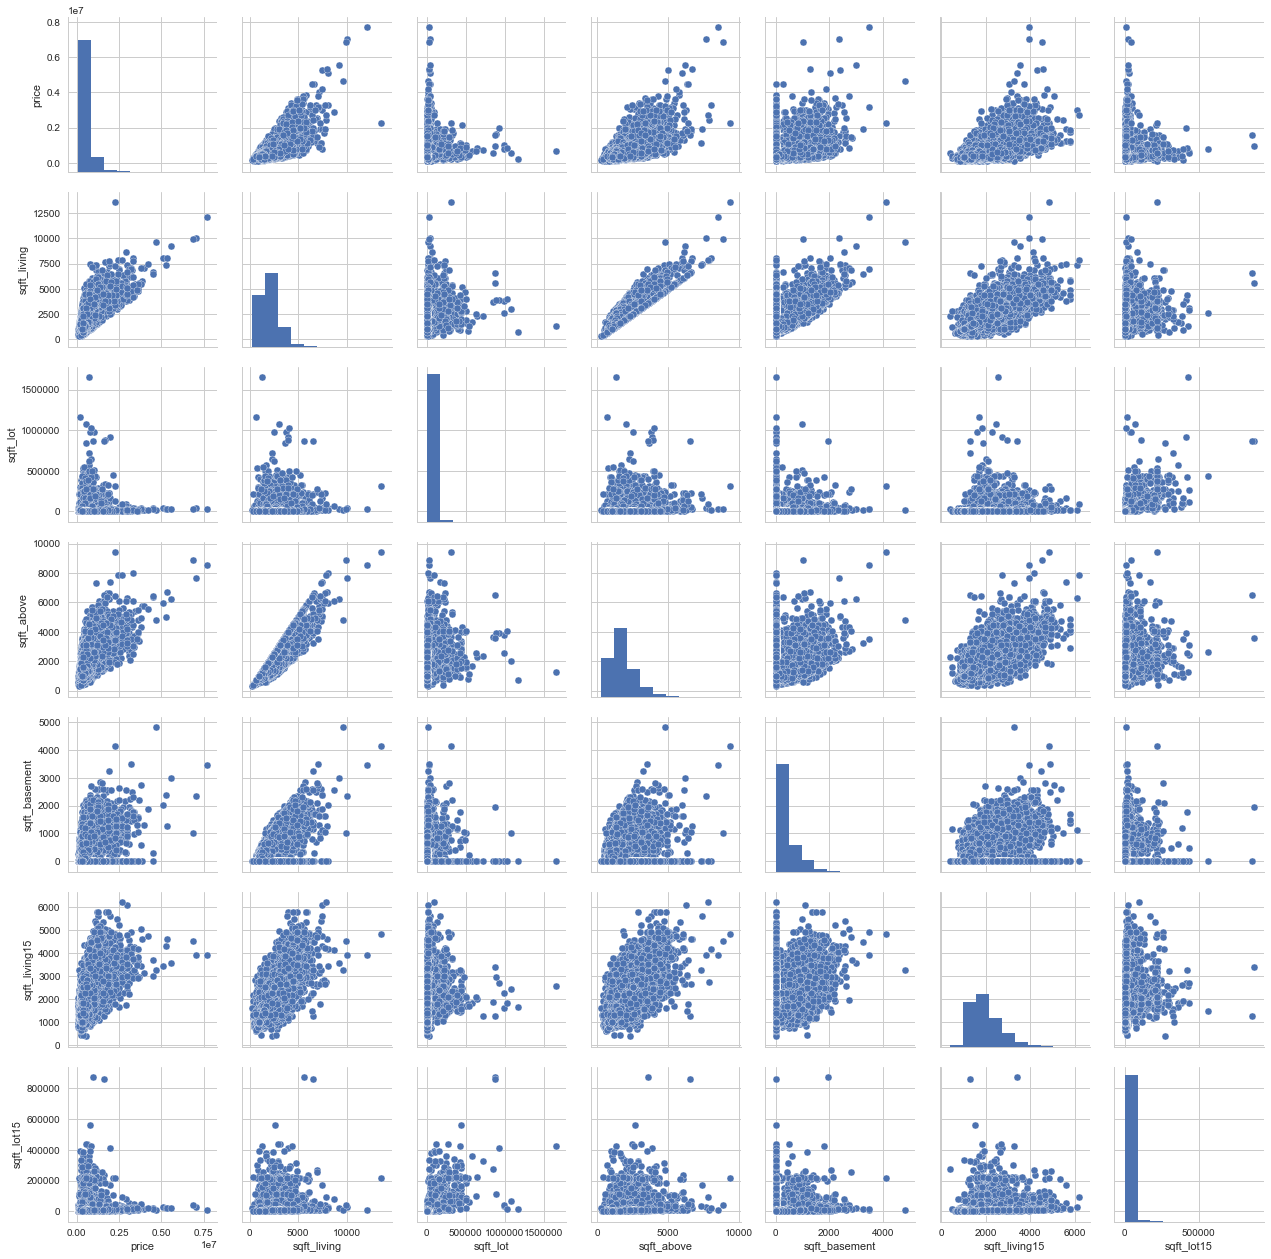

In [12]:
sb.pairplot(house_data[['price','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']])

In [13]:
# Here, by looking at the scatterplots, we can conclude that sqft_living,sqft_above,sqft_basement, waterfront, bathrooms, sqft_living,sqft_loft and bedroom has
# a linear relationship with price and hence we can use it for our model

# Now, that we have discovered linear relationship, lets check for co-linearlity between the variables
# We will use the Pearson co-relation method for that


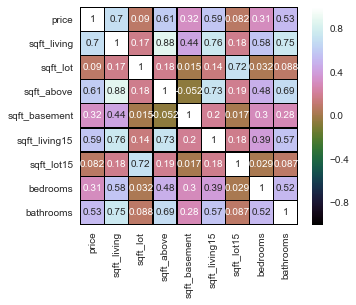

In [14]:
num_list=['price','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15','bedrooms','bathrooms']
house_data_for_Heatmap=house_data[num_list]
sb.heatmap(house_data_for_Heatmap.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

In [15]:
# Here, from above we can clearly see that sqt_living, sqft_above and sqft_living15 are highly corelated
# Thus we will skip sqft_above and sqft_living15 from our linear model
# Since adding more factors to a linear model may fail the model
# Multi colinearity increases the standard error of coefficients

# R values range from -1 to 1
# A R value of 0 means that the two values are not related at all
# Also, co-relation does not prove causation

In [16]:
features=['sqft_living','sqft_lot','sqft_basement','sqft_lot15','view','bedrooms','lat','waterfront','bathrooms','condition', 'grade']
# features=['sqft_living','sqft_lot','sqft_basement','sqft_lot15','waterfront','bathrooms']
target=['price']


In [17]:
feature_array=house_data[features].as_matrix()
target_array=house_data[target].as_matrix()
# feature_array_sacled=scale(feature_array)
# target_array_scaled=scale(target_array)
# target_array=house_for_target[target_name].as_matrix()
# feature_array=house_for_feature[feature_list_names].as_matrix()

In [18]:
LinReg = LinearRegression(normalize=True)

LinReg.fit(feature_array,target_array)

print (LinReg.score(feature_array,target_array))

# score is the co-efficient of determination or r-squared

0.666821704576


In [20]:
# Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
#        'waterfront', 'view', 'condition', 'grade', 'sqft_above',
#        'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
#        'sqft_living15', 'sqft_lot15'],
#       dtype='object')
LinReg_ranking = (np.abs(LinReg.coef_), house_data[features])
LinReg_ranking

(array([[  1.99463015e+02,   1.31296104e-01,   4.47201813e+00,
           5.40625670e-01,   6.58015144e+04,   2.97712971e+04,
           6.65097457e+05,   5.98076559e+05,   7.18156261e+03,
           5.67957804e+04,   8.35628814e+04]]),
        sqft_living  sqft_lot  sqft_basement  sqft_lot15  view  bedrooms  \
 0             1180      5650              0        5650     0         3   
 1             2570      7242            400        7639     0         3   
 2              770     10000              0        8062     0         2   
 3             1960      5000            910        5000     0         4   
 4             1680      8080              0        7503     0         3   
 5             5420    101930           1530      101930     0         4   
 6             1715      6819              0        6819     0         3   
 7             1060      9711              0        9711     0         3   
 8             1780      7470            730        8113     0         3   
 9 

In [21]:
features
# From above, we can conclude that the most significant variable is grade 
# From pearson corelation, we have already eliminated variables which were not good features

['sqft_living',
 'sqft_lot',
 'sqft_basement',
 'sqft_lot15',
 'view',
 'bedrooms',
 'lat',
 'waterfront',
 'bathrooms',
 'condition',
 'grade']

In [57]:
# Import the necessary module
from sklearn.model_selection import cross_val_score

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(LinReg, feature_array, target_array, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

# find the mean of our cv scores here
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[ 0.66385859  0.65591839  0.65171732  0.6696373   0.67892424]
Average 5-Fold CV Score: 0.6640111683925402
